# <center>Noto 7.5 Mw 2024 Earthquake Project</center>
<center>by: Haidir Jibran</center>
<center>haidirjibran@gmail.com</center>

Noto 4.5 Mw 2024 merupakan gempa bumi besar yang sangat merusak diwilayah utara kepulauan jepang.......

<b>1. Import Module and Library</b>

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

<b>2. Mengambil Event Gempa Noto 7.5 Mw 2024</b>

Menurut Wikipedia, gempa ini terjadi pada wilayah semenanjung Noto Jepang yang berada pada koordinat 37.488N,137.271E yang terjadi pada 1 januari 2024 pukul 16.10 waktu setempat (07.10 UTC) https://en.wikipedia.org/wiki/2024_Noto_earthquake

Mendefinisikan variabel yang telah diketahui

In [7]:
eventlatitude = 37.488
eventlongitude = 137.217
eventtime = UTCDateTime('2024-01-01T16:10:00+09')

1 Event(s) in Catalog:
2024-01-01T07:10:09.474000Z | +37.489, +137.264 | 7.5  mww


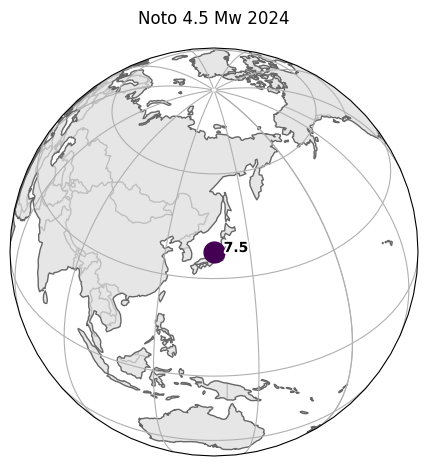

[Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=49462969"), time=UTCDateTime(2024, 1, 1, 7, 10, 9, 474000), longitude=137.2638, latitude=37.4893, depth=10000.0, creation_info=CreationInfo(author='pt,at,us'))]


In [8]:
client = Client('IRIS')
event = client.get_events(starttime=eventtime-10, endtime=eventtime+10, longitude=longitude, latitude=latitude, maxradius=0.5)
print(event)
event.plot(projection='ortho', title="Noto 4.5 Mw 2024")
plt.close()

print(event[0].origins)

base on A topographic map of Japan :https://en.wikipedia.org/wiki/Japan#/media/File:Japan_topo_en.jpg range of coordinate japan is 125-150E and 25-50N

here we want to plot the whole event in japan for 5 years lately (aug 2019 - aug 2024) for know the sesmicity in japan and the position of the event we want to analisys

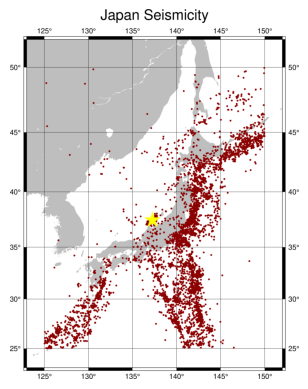

In [9]:
#os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 125:150 --lat 25:50 --mag 4:10 -o ./data/whole_japan.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Japan Seismicity":WESN -Ggray -K > ./postscript/whole_japan.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/whole_japan.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/whole_japan.ps')
os.system('gmt psconvert ./postscript/whole_japan.ps -A -Tg')
plot_whole_japan=img.imread('./postscript/whole_japan.png')
plt.axis('off')
plt.imshow(plot_whole_japan)
plt.show()
plt.close()

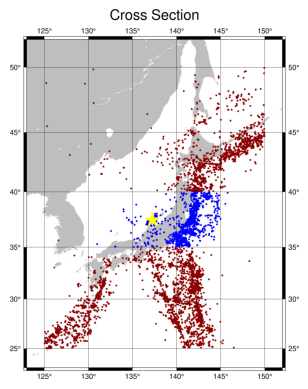

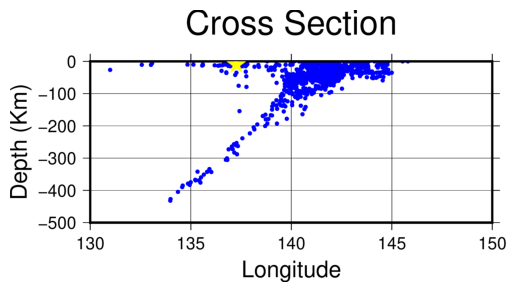

In [10]:
#os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 130:150 --lat 35:40 --mag 4:10 -o ./data/crosec.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Cross Section":WESN -Ggray -K > ./postscript/crosec.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/crosec.ps")
os.system("awk -F'|' '{print $4,$3}' ./data/crosec.txt | gmt psxy -R -J -Sc0.1 -Gblue -O -K >> ./postscript/crosec.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/crosec.ps')
os.system('gmt psconvert ./postscript/crosec.ps -A -Tg')
plot_crosec=img.imread('./postscript/crosec.png')
plt.axis('off')
plt.imshow(plot_crosec)
plt.show()
plt.close()

os.system("awk -F'|' '{print $4,$5*-1}' ./data/crosec.txt | gmt psxy -R130/150/-500/0 -JX10/4 -Ba5g5:Longitude:/a100g100:'Depth (Km)'::.'Cross Section':WeSn -Sc0.1 -Gblue -K > ./postscript/xsec.ps")
os.system('echo 137.264 -10 | gmt psxy -R -J -Sa0.5 -Gyellow -O >> ./postscript/xsec.ps')
os.system('gmt psconvert ./postscript/xsec.ps -A -Tg')
plot_xsec=img.imread('./postscript/xsec.png')
plt.axis('off')
plt.imshow(plot_xsec)
plt.show()

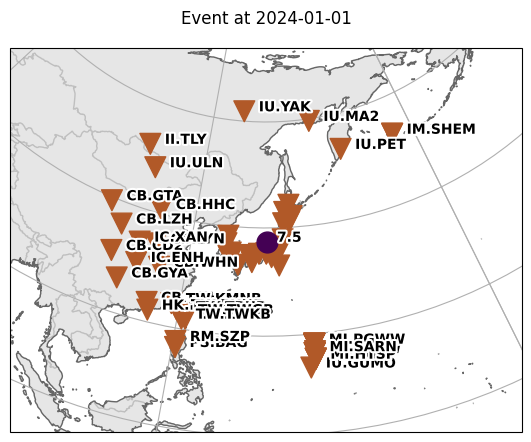

In [54]:
near_stations = client.get_stations(starttime=eventtime, endtime=eventtime+1800, location=' ,00', channel='BHZ', level='channel', longitude=eventlongitude, latitude=eventlatitude, minradius=2, maxradius=8)
far_stations = client.get_stations(starttime=eventtime, endtime=eventtime+1800, location=' ,00', channel='BHZ', level='channel', longitude=eventlongitude, latitude=eventlatitude, minradius=20, maxradius=30)

fig1 = far_stations.plot(projection='local', label=0.2, resolution='h', show=False)
fig2 = near_stations.plot(projection='local', label=False, resolution='h', fig=fig1, show=False)
event.plot(projection='local', resolution='h', fig=fig2)
plt.close()

In [71]:
network = []
station = []
location = []
channel = []
longitude = []
latitude = []

for net in range(len(near_stations)):
    for sta in range(len(near_stations[net].stations)):
        for cha in range(len(near_stations[net].stations[sta].channels)):
            network.append(near_stations[net].code)
            station.append(near_stations[net].stations[sta].code)
            location.append(near_stations[net].stations[sta].channels[cha].location_code)
            channel.append(near_stations[net].stations[sta].channels[cha].code)
            longitude.append(near_stations[net].stations[sta].channels[cha].longitude)
            latitude.append(near_stations[net].stations[sta].channels[cha].latitude)

for net in range(len(far_stations)):
    for sta in range(len(far_stations[net].stations)):
        for cha in range(len(far_stations[net].stations[sta].channels)):
            network.append(far_stations[net].code)
            station.append(far_stations[net].stations[sta].code)
            location.append(far_stations[net].stations[sta].channels[cha].location_code)
            channel.append(far_stations[net].stations[sta].channels[cha].code)
            longitude.append(far_stations[net].stations[sta].channels[cha].longitude)
            latitude.append(far_stations[net].stations[sta].channels[cha].latitude)    

In [79]:
total_stations = len(station)

for i in range(len(network)):
    try:
        waveform = client.get_waveforms(network[i], station[i], location[i], channel[i], starttime=eventtime, endtime=eventtime+1800,
                                        filename='./waveform/{}.{}.{}.{}.SAC'.format(network[i], station[i], location[i], channel[i]))
    except:
        drop = i-total_stations
        del network[drop]
        del station[drop]
        del location[drop]
        del channel[drop]
        del longitude[drop]
        del latitude[drop]

print(len(network))

27


In [80]:
print(station)

['INU', 'ERM', 'JEM', 'JEW', 'JHJ2', 'JHS', 'JKA', 'JMM', 'JMN', 'JNU', 'JSG', 'JTM', 'JTU', 'JWT', 'JYT', 'TJN', 'BUS3', 'CHJ3', 'SH2B', 'INU', 'TJN', 'WHN', 'HKPS', 'HKPS', 'ENH', 'XAN', 'TLY']
